In [23]:
# get the current working directory
import os
os.getcwd()
import shutil
import glob

In [24]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import keras
import numpy as np # linear algebra
import keras.backend as K 
import time as ti 
import cv2
import os
import glob # for including images
import scipy.io as sio
from sklearn.metrics import classification_report, confusion_matrix
from keras import layers
from keras import models
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D
from tensorflow.python.keras.layers import Conv2D, DepthwiseConv2D, MaxPooling2D, AveragePooling2D  
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import RMSprop, SGD, Adadelta, Adam 
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.applications import MobileNetV2

In [25]:
X_train = [] # training fruit images
y_train = [] # training fruit labels 

X_test = [] # test fruit images
y_test = [] # test fruit labels 

In [26]:
# selected data
fruits = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]
fruits

dir = 'selected_data'
if os.path.exists(dir):
    shutil.rmtree(dir)
os.makedirs(dir)

In [27]:
dirs = glob.glob(".\\fruits-360\\Training\\*")

exclude = ["Grapefruit", "Tomato Cherry"]

remove = []

for x in exclude:
    remove = remove + [s for s in dirs if x in s]
    
remove

['.\\fruits-360\\Training\\Grapefruit Pink',
 '.\\fruits-360\\Training\\Grapefruit White',
 '.\\fruits-360\\Training\\Tomato Cherry Red']

In [30]:
for i in fruits:
    matching = [s for s in dirs if i in s]
    if i == "Cherry":
        try:
            matching.remove('.\\fruits-360\\Training\\Tomato Cherry Red')
        except ValueError:
            pass  # do nothing!
    else:
        try:
            matching.remove('.\\fruits-360\\Training\\Grapefruit White')
        except ValueError:
            pass  # do nothing!
        try:
            matching.remove('.\\fruits-360\\Training\\Grapefruit Pink')
        except ValueError:
            pass  # do nothing!
    dir = "selected_data\\Training\\" + i
    if os.path.exists(dir):
        shutil.rmtree(dir)
    os.makedirs(dir)
    for a in matching:
        file = glob.glob(a+"\\*")
        for b in file:
            shutil.copy(b, dir)

In [31]:
# Training dataset
# We will need the images in a 32x32x3 input format.


for dir_path in glob.glob(".\\selected_data\\Training\\*"):
    img_label = dir_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X_train.append(img)
        y_train.append(img_label)
        
X_train=np.array(X_train)
y_train=np.array(y_train)

In [34]:
dirs = glob.glob(".\\fruits-360\\Test\\*")

exclude = ["Grapefruit", "Tomato Cherry"]

remove = []

for x in exclude:
    remove = remove + [s for s in dirs if x in s]
    
remove

['.\\fruits-360\\Test\\Grapefruit Pink',
 '.\\fruits-360\\Test\\Grapefruit White',
 '.\\fruits-360\\Test\\Tomato Cherry Red']

In [35]:
for i in fruits:
    matching = [s for s in dirs if i in s]
    if i == "Cherry":
        try:
            matching.remove('.\\fruits-360\\Test\\Tomato Cherry Red')
        except ValueError:
            pass  # do nothing!
    else:
        try:
            matching.remove('.\\fruits-360\\Test\\Grapefruit White')
        except ValueError:
            pass  # do nothing!
        try:
            matching.remove('.\\fruits-360\\Test\\Grapefruit Pink')
        except ValueError:
            pass  # do nothing!
    dir = "selected_data\\Test\\" + i
    if os.path.exists(dir):
        shutil.rmtree(dir)
    os.makedirs(dir)
    for a in matching:
        file = glob.glob(a+"\\*")
        for b in file:
            shutil.copy(b, dir)

In [36]:
# Test dataset 
# Images will also be in a 32x32x3 format.

X_test = [] # test fruit images
y_test = [] # test fruit labels 

for dir_path in glob.glob(".\\selected_data\\Test\\*"):
    img_label = dir_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X_test.append(img)
        y_test.append(img_label)

X_test=np.array(X_test)
y_test=np.array(y_test)

In [37]:
X_train = X_train/255.0
X_test = X_test/255.0

In [38]:
print(y_test)

['Apple' 'Apple' 'Apple' ... 'Tomato' 'Tomato' 'Tomato']


In [39]:
# Now we need to have them labeled with numbers
label_to_id={v:k for k, v in enumerate(np.unique(y_train))}
#print(label_to_id)

y_train_label_id = np.array([label_to_id[i] for i in y_train])
y_test_label_id = np.array([label_to_id[i] for i in y_test])

# We need to translate this to be "one hot encoded" so our CNN can understand, 
# otherwise it will think this is some sort of regression problem on a continuous axis

from keras.utils.np_utils import to_categorical
print(y_train_label_id.shape)

y_cat_train_label_id=to_categorical(y_train_label_id)
y_cat_test_label_id=to_categorical(y_test_label_id)

(9192,)


In [40]:
# def build_model():
#     mobilenetv2 = MobileNetV2(input_shape=(32, 32, 3), alpha=1, weights=None, include_top=False,classes=120)

    #Varianta 1
#     model=Sequential(mobilenetv2.layers)
#     model.add(layers.GlobalAveragePooling2D())
#     model.add(layers.Dense(120, activation='softmax'))
    
    # Varianta 2
#     model = Sequential([mobilenetv2,Dense(120, activation='softmax')])

    # Varianta 3
#     model=Sequential()
#     model.add(mobilenetv2)
#     model.add(layers.GlobalAveragePooling2D())
#     model.add(layers.Dense(120, activation='softmax'))
    
   
#     return model

In [41]:
model = MobileNetV2(input_shape=(32, 32, 3), alpha=1, weights=None,classes=10)
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "mobilenetv2_1.00_32"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 33, 33, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
________________________________________________________________________________

In [42]:
input_shape=(32,32,3)
epochs=30



filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

result = model.fit(X_train,y_cat_train_label_id,
                       batch_size=15,
                       epochs=30,
                       verbose=1,
                       validation_data=(X_test,y_cat_test_label_id),
                       callbacks=callbacks_list
                      )

Train on 9192 samples, validate on 5799 samples
Epoch 1/30
9192/9192 [==============================] - 142s 15ms/step - loss: 1.0968 - accuracy: 0.6648 - val_loss: 2.2881 - val_accuracy: 0.1409

Epoch 00001: val_accuracy improved from -inf to 0.14089, saving model to weights-improvement-01-0.14.hdf5
Epoch 2/30
9192/9192 [==============================] - 129s 14ms/step - loss: 0.4796 - accuracy: 0.8605 - val_loss: 2.2930 - val_accuracy: 0.1028

Epoch 00002: val_accuracy did not improve from 0.14089
Epoch 3/30
9192/9192 [==============================] - 133s 14ms/step - loss: 0.2952 - accuracy: 0.9224 - val_loss: 2.3053 - val_accuracy: 0.1028

Epoch 00003: val_accuracy did not improve from 0.14089
Epoch 4/30
9192/9192 [==============================] - 123s 13ms/step - loss: 0.2253 - accuracy: 0.9403 - val_loss: 2.3062 - val_accuracy: 0.1028

Epoch 00004: val_accuracy did not improve from 0.14089
Epoch 5/30
9192/9192 [==============================] - 123s 13ms/step - loss: 0.2280 - a

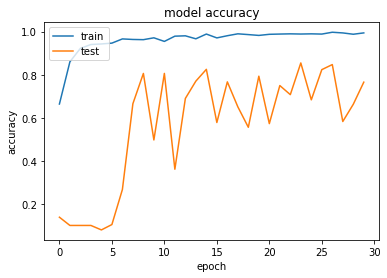

In [43]:
plt.figure(1)  
plt.plot(result.history['accuracy'])  
plt.plot(result.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

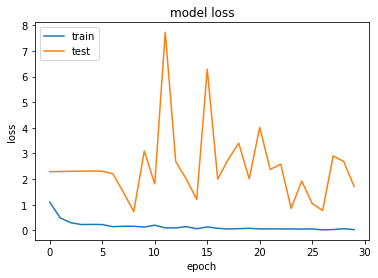

In [44]:
plt.plot(result.history['loss'])  
plt.plot(result.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [46]:
# Load weights
model.load_weights("weights-improvement-24-0.85.hdf5")

# Compile model (required to make predictions)
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
print("Created model and loaded weights from file")
model.evaluate(X_test,y_cat_test_label_id)

Created model and loaded weights from file
5799/5799 [==============================] - 9s 2ms/step


[0.851367693024734, 0.8549749851226807]

In [47]:
model.save("MobileNetV2 - 131 - 2.0.h5")

In [100]:
prediction = model.predict(X_test)

array([[8.53772283e-01, 4.27941186e-03, 1.09277407e-05, ...,
        7.88544246e-04, 1.32778376e-01, 1.57947114e-04],
       [9.99528766e-01, 5.82884786e-05, 6.22069649e-07, ...,
        2.58144792e-06, 2.88906740e-04, 3.28447777e-06],
       [9.99473155e-01, 1.06305415e-04, 1.25143049e-06, ...,
        5.14973772e-06, 2.66408228e-04, 8.23639402e-06],
       ...,
       [9.03742359e-11, 6.99487135e-11, 7.02309599e-10, ...,
        1.95960414e-12, 8.72619945e-12, 1.00000000e+00],
       [2.59051513e-11, 2.81394127e-11, 3.59225677e-10, ...,
        6.36768145e-13, 2.36899649e-12, 1.00000000e+00],
       [4.38607717e-03, 3.17819696e-03, 1.13786049e-01, ...,
        3.58242989e-01, 4.32972843e-03, 4.04471606e-02]], dtype=float32)